## Data Pre-processing

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve

# import warnings
# warnings.filterwarnings('ignore')

### Overlook the data

In [2]:
# read the csv file
df = pd.read_csv('churn.csv')
# check the na values
print('=isnull==========================================================')
print(df.isnull().sum())
# check the duplicate values
print('=duplicated======================================================')
print(df.duplicated().sum())
# check the unique values
print('=nunique=========================================================')
print(df.nunique())
# check the data types
print('=dtypes=========================================================')
print(df.dtypes)
# check the data shape
print('=if it is unbalance==============================================')
print("not Exited 0 : ",df[df['Exited']==0].shape)
print("Exited 1 : ",df[df['Exited']==1].shape)
# check the overall data 
df

=isnull==========================================================
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
=duplicated======================================================
0
=nunique=========================================================
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64
=dtypes=========================================================
RowNumber            int64
CustomerId           int64
Surname    

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Pre-processing function 

In [3]:
# the preprocessing definiation function
def preprocesssing(df):    
    # Drop the Surname, RowNumber, and CustomerId columns (no duplicates, all unique)
    df.drop(columns=['Surname'],inplace=True)
    df.drop(columns=['RowNumber'],inplace=True)
    df.drop(columns=['CustomerId'],inplace=True)
    #Make dummies from categroical variales
    categorical_cols = [
        'Geography', 'Gender', 'IsActiveMember'
    ]
    df = pd.get_dummies(df,
                        columns=categorical_cols,
                        dummy_na=False, # there's no nan in the df
                        drop_first=False)
    return df

df = preprocesssing(df)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,1
1,608,41,1,83807.86,1,0,112542.58,0,0,0,1,1,0,0,1
2,502,42,8,159660.80,3,1,113931.57,1,1,0,0,1,0,1,0
3,699,39,1,0.00,2,0,93826.63,0,1,0,0,1,0,1,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,96270.64,0,1,0,0,0,1,1,0
9996,516,35,10,57369.61,1,1,101699.77,0,1,0,0,0,1,0,1
9997,709,36,7,0.00,1,0,42085.58,1,1,0,0,1,0,0,1
9998,772,42,3,75075.31,2,1,92888.52,1,0,1,0,0,1,1,0


### Visualization the data

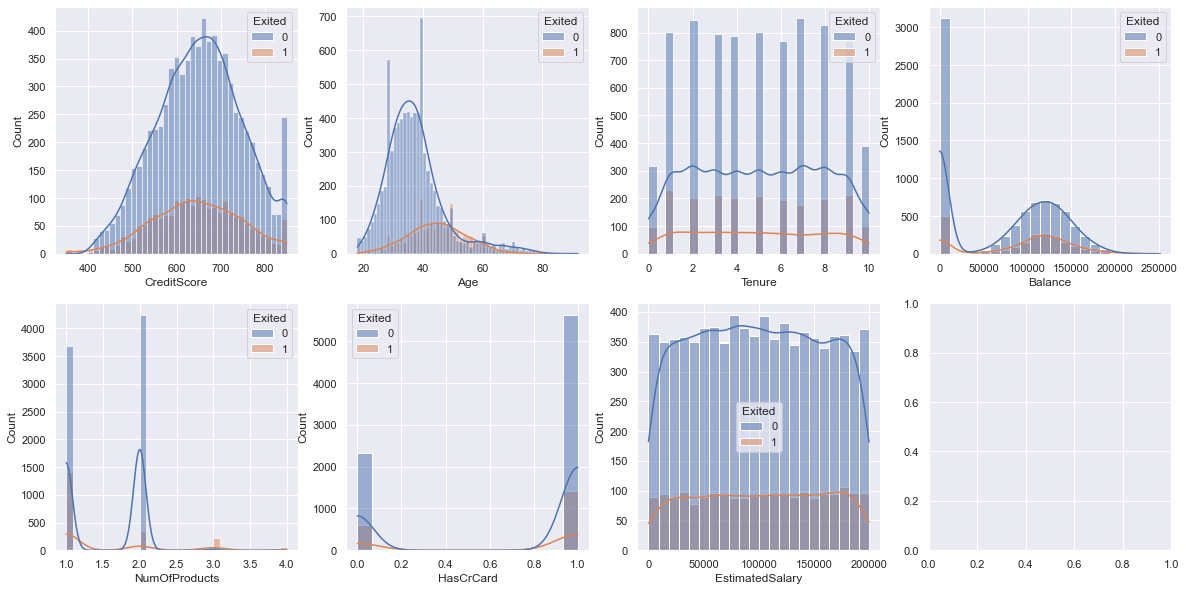

<Figure size 432x288 with 0 Axes>

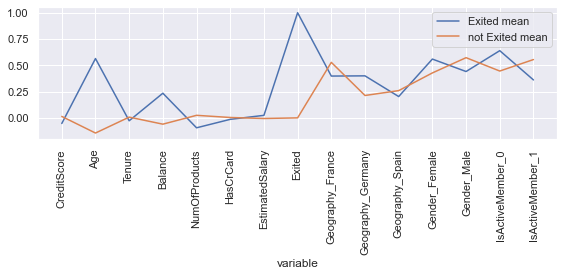

In [5]:
# plotting the variable of 1 and 0 of distribution (after pre-processing)
numeric_columns = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'
]
df_plot = df.copy()

# see all the features differences of 0 and 1 with the mean (after preprocessing)
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(numeric_columns):
    if i < 4:
        sns.histplot(df_plot, x=f"{col}", hue = "Exited", kde=True, color="skyblue", ax=axs[0, i])
    else:
        sns.histplot(df_plot, x=f"{col}", hue = "Exited", kde=True, color="skyblue", ax=axs[1, i-4])
plt.figure()


# Note rthat we take a look at the scalar data (but not really apply the scalar here, we should apply after the split
scaler = StandardScaler()
df_plot[numeric_columns] = scaler.fit_transform(df_plot[numeric_columns])
# Plot out to see the mean of the data
df_Exited_describe  = df_plot[df_plot['Exited']==1].describe()
df_not_Exited_describe  = df_plot[df_plot['Exited']==0].describe()
df_Exited_mean = df_Exited_describe.iloc[1:2]
df_not_Exited_mean = df_not_Exited_describe.iloc[1:2]
df_Exited_mean_transposed = df_Exited_mean.T 
df_not_Exite_mean_transposed = df_not_Exited_mean.T 

df_Exited_mean_transposed['variable'] = df_Exited_mean_transposed.index
df_not_Exite_mean_transposed['variable'] = df_not_Exite_mean_transposed.index
df_Exited_mean_transposed = df_Exited_mean_transposed.rename(columns={'mean': 'Exited mean'}, index={'variable': 'variable'})
df_not_Exite_mean_transposed = df_not_Exite_mean_transposed.rename(columns={'mean': 'not Exited mean'}, index={'variable': 'variable'})

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

ax = df_Exited_mean_transposed.plot(x='variable', y='Exited mean')
df_not_Exite_mean_transposed.plot(ax=ax, x='variable', y='not Exited mean')

plt.xticks(range(len(df_Exited_mean_transposed['variable'])),list(df_not_Exite_mean_transposed['variable']),rotation=90)
plt.show()

## Benchmarking model

### NN

In [6]:
y = df['Exited'] # 1 in the case of Exited; 0 not Exited
X = df.drop(columns='Exited')

# split training, validation and test sets
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, train_size=0.75, random_state=461)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_val, Y_train_val, train_size = 0.8, random_state=461)
print(X_train.shape, X_valid.shape , X_test.shape)

numeric_columns = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_valid[numeric_columns] = scaler.transform(X_valid[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

(6000, 14) (1500, 14) (2500, 14)


In [43]:
# clean sessions and set seeds
tf.keras.backend.clear_session()
np.random.seed(231)
tf.random.set_seed(631)

In [44]:
# create tensorflow model
model_benchmarking = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(100, kernel_initializer = 'uniform',activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(100, kernel_initializer = 'uniform',activation="relu"),
    tf.keras.layers.Dense(1, kernel_initializer = 'uniform', activation="sigmoid")
    ])

# early_stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# compile the model
model_benchmarking.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])
# keep track of the perforance
log = model_benchmarking.fit(X_train, Y_train, 
                epochs=200, 
                validation_data=(X_valid, Y_valid),
               )

print("MSE on test set: " + str(model_benchmarking.evaluate(X_test, Y_test)))


Epoch 1/200
188/188 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.7908 - val_loss: 0.5791 - val_accuracy: 0.8060
Epoch 2/200
188/188 [==============================] - 0s 825us/step - loss: 0.5616 - accuracy: 0.7912 - val_loss: 0.5320 - val_accuracy: 0.8060
Epoch 3/200
188/188 [==============================] - 0s 802us/step - loss: 0.5327 - accuracy: 0.7912 - val_loss: 0.5106 - val_accuracy: 0.8060
Epoch 4/200
188/188 [==============================] - 0s 808us/step - loss: 0.5200 - accuracy: 0.7912 - val_loss: 0.5004 - val_accuracy: 0.8060
Epoch 5/200
188/188 [==============================] - 0s 805us/step - loss: 0.5142 - accuracy: 0.7912 - val_loss: 0.4951 - val_accuracy: 0.8060
Epoch 6/200
188/188 [==============================] - 0s 796us/step - loss: 0.5112 - accuracy: 0.7912 - val_loss: 0.4920 - val_accuracy: 0.8060
Epoch 7/200
188/188 [==============================] - 0s 816us/step - loss: 0.5093 - accuracy: 0.7912 - val_loss: 0.4898 - val_accu

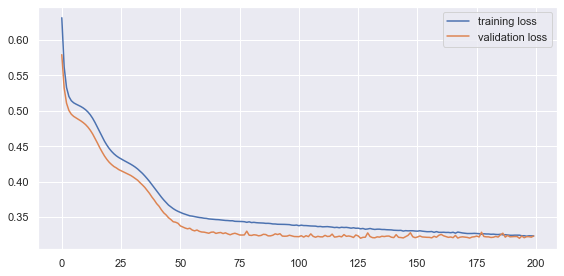

In [45]:
# visualise the lost 
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

In [17]:
# evalute the model on test set
model_benchmarking.evaluate(X_test, Y_test)

79/79 [==============================] - 0s 527us/step - loss: 0.3364 - accuracy: 0.8644


[0.33638548851013184, 0.8644000291824341]

### Logistic Regression

In [20]:
# Step1: Train logistic model on the training set
logm_train = LogisticRegression(max_iter=2000).fit(X_train,Y_train.values.ravel()) 
print("Intercept = ",logm_train.intercept_)
print("Model coefficients = ", logm_train.coef_)
print("R^2 =",logm_train.score(X_train, Y_train))

Intercept =  [-1.52172915]
Model coefficients =  [[-0.05680541  0.75884992 -0.04201821  0.17653164 -0.06021423 -0.02673678
   0.019338   -0.22301738  0.49988079 -0.27701239  0.25583649 -0.25598547
   0.54510189 -0.54525087]]
R^2 = 0.8051666666666667


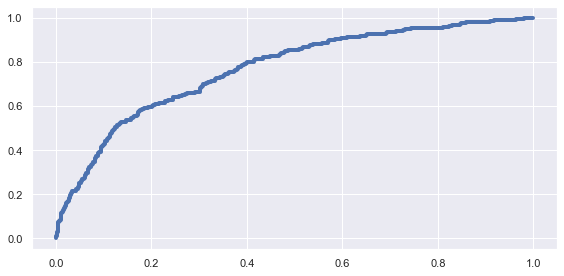

roc_auc_score 0.7688498915635597
Threshold =  0.2694245445088527


In [33]:
# Step2: Use validation set to pick right threshold
# fit the validation data to the trian model
Y_probs =logm_train.predict_proba(X_valid)[:,1]
# get the fpr tpr score
fpr, tpr, thresholds = metrics.roc_curve(Y_valid,Y_probs)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
#check the ROC score
print('roc_auc_score',roc_auc_score(Y_valid,Y_probs))
# get the threshold
threshold = thresholds[np.argmax(tpr - fpr)]
print("Threshold = ",threshold)

In [23]:
# Step3: Retraining the final model with training+validation
train_val_X = pd.concat([X_train, X_valid])
train_val_Y = pd.concat([Y_train, Y_valid])

logm = LogisticRegression(max_iter=2000).fit(train_val_X, train_val_Y.values.ravel())
print("Intercept = ",logm.intercept_)
print("Model coefficients = ", logm.coef_)
print("R^2 =",logm.score(train_val_X, train_val_Y))

Intercept =  [-1.53760524]
Model coefficients =  [[-0.0637945   0.75226218 -0.05868013  0.17219356 -0.05570781 -0.0314775
   0.0267751  -0.24004486  0.49858486 -0.25859003  0.24906609 -0.24911612
   0.55505511 -0.55510514]]
R^2 = 0.8089333333333333


Accuracy =  0.7576
[[1614  393]
 [ 213  280]]


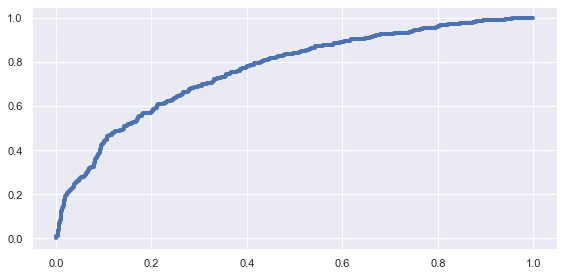

0.7641702317749944

In [38]:
# Step4: Test the accuracy of training + validation logistic model on the testing set
# test dataset to check accuracy_score
Y_probs_test =logm.predict_proba(X_test)[:,1]
Y_pred_test = np.where(Y_probs_test > threshold, 1, 0) #imput the threshold
cm = confusion_matrix(Y_test,Y_pred_test)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("Accuracy = ",(TP+TN)/(TP+TN+FP+FN)) # or metrics.accuracy_score(Y_test,Y_pred_test)
print(cm)

# get the fpr tpr score
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_probs_test)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
#check the ROC score
roc_auc_score(Y_test,Y_probs_test)